# <font color='#eb3483'> Support Vector Machines (SVM) </font>

Support vector machines were all the rage ten years ago and still remain an awesome machine learning algorithm. SVMs work by trying to find a hyperplane (a fancy high-dimensional verson of a line/plane) in N-dimensional space (where N is the number of features) that separates your data-points into different classes. In this module we'll walk through how to train a SVM using scikit-learn and visualize it. 

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) 

### <font color='#eb3483'> Iris Data </font>

We are going to use a new dataset (a classic!), the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris), a multiclass classification problem that has information on 4 different types of iris flowers. While this data-set is included with seaborn, we can also load it from sklearn (this is great experience for finding quick data-sets for when you teach your own data science course)!

![title](media/iris_with_labels.jpg)

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

In [3]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris = pd.DataFrame(data.data, columns=data.feature_names)

iris["target"] = data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
from sklearn.model_selection import train_test_split

features = iris.drop("target", axis=1).columns
X = iris[features]
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### <font color='#eb3483'> Training a SVM </font>

SVM models in `scikit-learn` are in the module `sklearn.svm`.   

SVM is another algorithm that can be used both for regression (continuous variables) and classification (categories).  

There is an implementation for regression (`SVR`) and another one for classification (`SVC`).

In [8]:
from sklearn.svm import SVC, SVR
estimator_svm =  SVC()
estimator_svm.fit(X_train, y_train)

SVC()

In [9]:
predictions = estimator_svm.predict(X_test)
predictions[:10]

array([0, 0, 1, 2, 1, 2, 0, 0, 2, 2])

Here are some parameters you might find helpful:
- **C** is the Cost parameter (that regulates the slack variables that help regularize the model).
- **kernel** specifies the kernel (rbf, (radial basis function) by default). We can use any kernel we define or any of the available ones (`rbf`, `poly` (polynomial), `linear`or `sigmoid`).
- **class_weight**, allows us to use a dictionary `{clase:peso}` that allows us to assign custom weights to classes. For imbalanced classification problems we can use `class_weight=balanced` that automatically balances the classes based on their support. 
- **decision_function_shape** Choose if using One-versus-one (ovo) or One-versus-rest (ovr) for multiclass classification.
- **probability**. If we want to calculate the class probabilities (and use `predict_proba`) (False by default).
- **cache_size** is the size in (megabytes) the model can use to store calculation data in memory. SVMs are computationally intensive, so the bigger the cache the better.

## <font color='#eb3483'>  Kernels </font>

Let's see  the effect of different kernels (i.e. ways to measure distance between points) on the decision hyperplane.

We will use only the first 2 dataset variables (sepal length and width) to be able to plot them on a scatter plot.

In [10]:
X = data.data[:, :2]
y = data.target
X.shape

(150, 2)

We are going to use a utility function in, `plot_decision_regions` that plots a diagram indicating the different decision regions for each class. You will need to install Mlxtend (machine learning extensions), a Python library of useful tools for the day-to-day data science tasks. `conda install mlxtend --channel conda-forge`

In [12]:
from mlxtend.plotting import plot_decision_regions

**Linear Kernel**
The linear kernel is defined as:

$$\text{Linear Kernel}: k(x,y) = x^Ty+c$$

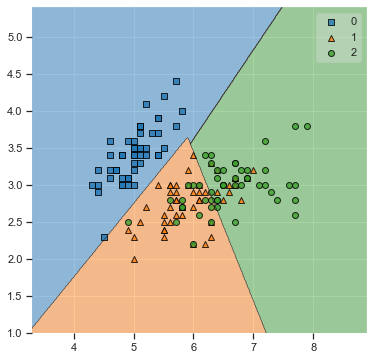

In [13]:
estimator_svm_lineal = SVC(kernel="linear")
estimator_svm_lineal.fit(X, y)

plot_decision_regions(X, y, clf=estimator_svm_lineal);

**Polynomial Kernel**
The polynomial kernel calculates the product of two vectors in a dimensional space of the polynomial combinations of the vectors. So if we have 2 vectors $V_1$ and $V_2$ shaped $[x_1, x_2]$, the polynomial kernel is going to transform them into $[x_1, x_2, x_1^2, x_1x_2, x_2^2...]$ . It has the formula:

$$\text{polynomial kernel}: k(x,y) = (\alpha x^Ty+c)^p$$

The polynomial kernel has a hyperparameter `d` (degree) that indicates the degree of the polynomial expansion (3 by default).

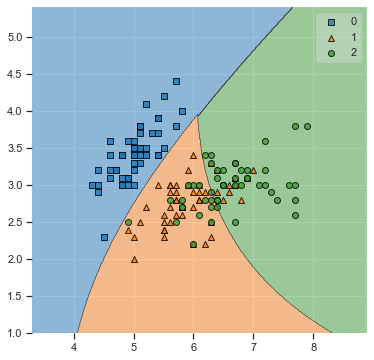

In [14]:
estimator_svm_polinomial = SVC(kernel="poly")
estimator_svm_polinomial.fit(X, y)

plot_decision_regions(X, y, clf=estimator_svm_polinomial);

We see that the decision boundary became a polynomial line (curved line). The more degrees of the expansion the more "curved" the lines can be. If we use a polynomial kernel with `degree=1` we get a linear kernel.

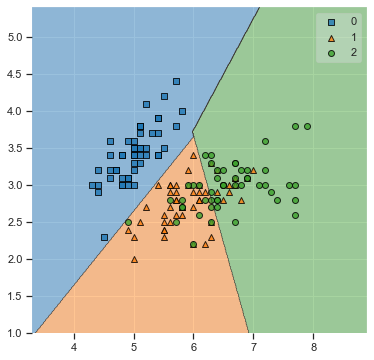

In [15]:
estimator_svm_polinomial_1 = SVC(kernel="poly", degree=1).fit(X, y)
plot_decision_regions(X, y, clf=estimator_svm_polinomial_1);

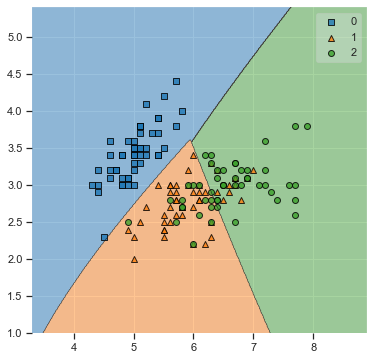

In [16]:
estimator_svm_polinomial_2 = SVC(kernel="poly", degree=2).fit(X, y)
plot_decision_regions(X, y, clf=estimator_svm_polinomial_2);

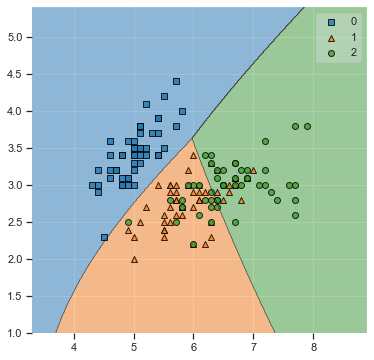

In [17]:
estimator_svm_polinomial_3 = SVC(kernel="poly", degree=3, gamma=0.1).fit(X, y)
plot_decision_regions(X, y, clf=estimator_svm_polinomial_3);

A low `d` reduces the complexity of the polynomial kernel (turning it into a linear kernel).

The **Radial Basis Function** (RBF) kernel does a radial transformation (that is, transforms the points based to their distance to the origin). It has the formulation:

$$\text{radial kernel}: k(x,y) = \exp(-\gamma ||x - y^2||))$$

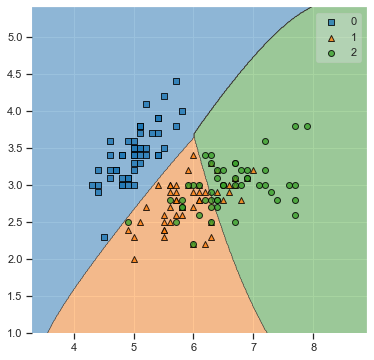

In [18]:
estimator_svm_rbf = SVC(kernel="rbf")
estimator_svm_rbf.fit(X, y)

plot_decision_regions(X, y, clf=estimator_svm_rbf);

We can control the shape of the decision boundary with the hyperparameter `gamma`:

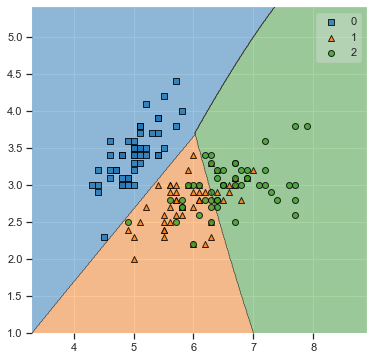

In [19]:
estimator_svm_rbf_a = SVC(kernel="rbf", gamma=0.1).fit(X, y)
plot_decision_regions(X, y, clf=estimator_svm_rbf_a);

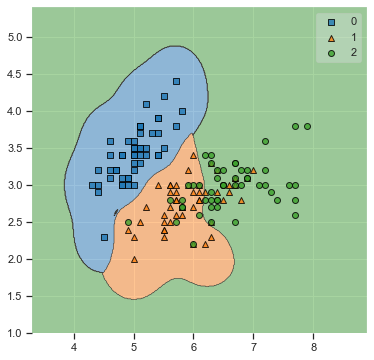

In [20]:
estimator_svm_rbf_b = SVC(kernel="rbf", gamma=7).fit(X, y)
plot_decision_regions(X, y, clf=estimator_svm_rbf_b);

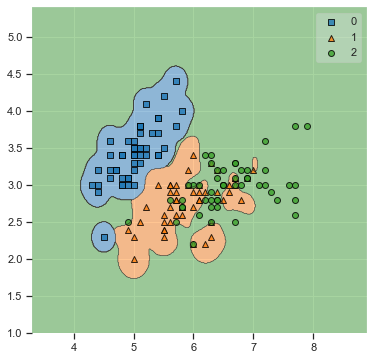

In [23]:
estimator_svm_rbf_c = SVC(kernel="rbf", gamma=50).fit(X, y)
plot_decision_regions(X, y, clf=estimator_svm_rbf_c);

Higher `gamma` values increase rbf's kernel capability to create areas around the data.
We see that for `gamma=100` the model is overfitting (basically creating tiny circles around each observation.